## Introduction

The purpose of this file is to implement an end-to-end process of complex Exploratory Data Analysis (EDA). This includes activities such as data investigation, cleaning, preparation, feature engineering, and, ultimately, the application of machine learning and statistical calculations. The main objective is to identify the most important features impacting the `value_eur` of players in the dataset.

## Tools and Techniques Used

- **Main Tool:**
  - Jupyter Notebook with a Python kernel was chosen as it allows for the combination of Markdown text with code.

- **Visualizations:**
  - Visualizations were primarily created using Plotly, enabling interactive data analysis.

- **Explainable AI:**
  - To identify the most important features, correlation analysis and machine learning (ML) were used, with additional validation to ensure task completion. For further interpretation, SHAP (SHapley Additive exPlanations) was implemented to explain the black-box ML models.

Lets go :)

In [1]:
#Import for data processing and vizualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Import for ML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import shap

In [2]:
# File path to the CSV data
file_path = r'C:\Users\mryok\OneDrive\Рабочий стол\New folder\df_players.csv'

# Read the CSV file with appropriate parameters
df = pd.read_csv(
    file_path,
    sep=';',                       # Use semicolon as the delimiter
    quotechar='"',                 # Use double quotes as the quote character
    header=0,                      # First row is the header
    skipinitialspace=True,         # Skip any spaces after delimiters
    index_col=0                    # Use the first column as the index (if desired)
)

df.head()

,sofifa_id,short_name,overall,potential,age,height_cm,weight_kg,club_name,league_name,club_contract_valid_until,preferred_foot,pace,shooting,passing,dribbling,defending,physic,formation,player_tags,value_eur
1,255438,R. Araki,67,80,19,170,60,Kashima Antlers,Japanese J. League Division 1,2022,Right,83.0,61.0,61.0,72.0,22.0,43.0,mid,NaN,2400000
2,246070,Iván Jaime,70,82,20,180,73,Futebol Clube de Famalicão,Portuguese Liga ZON SAGRES,2025,Right,72.0,70.0,65.0,71.0,50.0,60.0,mid,NaN,3800000
3,203173,Noguera,68,68,31,177,65,FC Goa,Indian Super League,2022,Right,75.0,62.0,67.0,69.0,57.0,59.0,mid,NaN,1e+06
4,178090,D. Biseswar,75,75,33,176,79,PAOK,Greek Super League,2022,Right,71.0,69.0,76.0,78.0,33.0,60.0,mid,NaN,3500000
5,223978,Manu García,73,82,23,169,66,Deportivo Alavés,Spain Primera Division,2022,Right,78.0,69.0,72.0,75.0,40.0,56.0,mid,NaN,7e+06


Points to Review Before Conducting Complex EDA:
- Data Structure: Examine the distributions within the data.
- Data Types: Verify that all data types are appropriate for each feature.
- Null/NaN Values: Identify and address any missing values.
- Data Overview: Check for and resolve any special characters or anomalies in the values.
- Class Balance: Assess the distribution of classes to ensure balanced representation.
- Value Standardization: Determine if values require unification or normalization and complete as needed.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5969 entries, 1 to 5969
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sofifa_id                  5969 non-null   int64  
 1   short_name                 5969 non-null   object 
 2   overall                    5969 non-null   int64  
 3   potential                  5969 non-null   int64  
 4   age                        5969 non-null   int64  
 5   height_cm                  5969 non-null   int64  
 6   weight_kg                  5969 non-null   int64  
 7   club_name                  5969 non-null   object 
 8   league_name                5969 non-null   object 
 9   club_contract_valid_until  5969 non-null   int64  
 10  preferred_foot             5969 non-null   object 
 11  pace                       5426 non-null   float64
 12  shooting                   5426 non-null   float64
 13  passing                    5426 non-null   float64
 1

In [4]:
exclude_columns = {'sofifa_id', 'short_name'}
# Dictionary comprehension to get unique values for columns not in the exclude list
unique_values = {col: df[col].unique().tolist() for col in df.columns if col not in exclude_columns}
# Print the unique values for each column
for key, value in unique_values.items():
    print(f"{key}: {value}")

overall: [67, 70, 68, 75, 73, 77, 66, 71, 63, 61, 76, 72, 78, 69, 65, 74, 55, 64, 79, 58, 81, 84, 85, 87, 56, 53, 54, 60, 82, 80, 59, 83, 88, 62, 86, 89, 52, 90, 57, 91, 50, 48, 51, 49, 93, 92]
potential: [80, 82, 68, 75, 77, 74, 76, 71, 70, 84, 79, 73, 86, 65, 78, 55, 72, 67, 66, 89, 61, 69, 85, 81, 88, 64, 87, 83, 58, 63, 62, 59, 90, 91, 60, 56, 92, 93, 57, 54, 53, 95]
age: [19, 20, 31, 33, 23, 24, 32, 17, 35, 27, 29, 30, 25, 21, 22, 28, 26, 18, 36, 37, 34, 38, 39, 41, 42, 43, 40]
height_cm: [170, 180, 177, 176, 169, 173, 178, 175, 184, 186, 190, 183, 179, 171, 188, 172, 187, 168, 182, 181, 174, 185, 162, 167, 161, 193, 192, 166, 165, 191, 195, 189, 198, 194, 196, 164, 201, 197, 199, 202, 200, 163, 160, 158, 156, 203]
weight_kg: [60, 73, 65, 79, 66, 68, 72, 70, 69, 67, 74, 81, 75, 59, 71, 87, 80, 76, 63, 84, 62, 83, 64, 82, 77, 90, 78, 61, 88, 92, 85, 93, 91, 94, 89, 86, 96, 95, 97, 99, 103, 98, 58, 100, 53, 56, 55, 54, 57]
club_name: ['Kashima Antlers', 'Futebol Clube de Famalicão',

In [5]:
# Duplicates in data
df.duplicated().value_counts()

False    5969
Name: count, dtype: int64

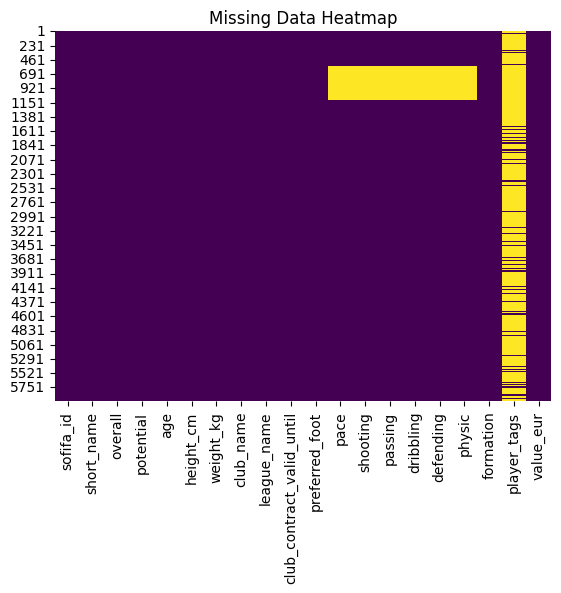

In [6]:
# Heatmap to see missing values in the data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

Special Attention Required:
- value_eur: Unified to a float format — Action required.
- player_tags: Removed special characters and cleaned any unusual symbols — Action required.
- Missing Data (NaN values): Needs to be addressed — Action required.

In [7]:
# Function to unify values to integers in cloumn with value_eurs
def convert_float(value):
    # Replace commas with dots to handle decimal separators
    value = value.replace(',', '.')
    try:
        return float(value)
    except ValueError:
        return None

# Apply the conversion function to the 'value_eur' column
df['value_eur'] = df['value_eur'].apply(convert_float)
# Create a new binary column 'has_tags' where 1 indicates the player has tags, and 0 indicates no tags.
df['has_tags'] = df['player_tags'].notna().astype(int)
# Replace any missing values in the 'player_tags' column with the string 'No Tag'.
df['player_tags'] = df['player_tags'].fillna('No Tag')
# Clean up the 'player_tags' column by removing any '#' characters and non-breaking spaces ('\xa0').
df['player_tags'] = df['player_tags'].apply(lambda x: x.replace('#', '').replace('\xa0', ''))

Before handling missing values, the distribution of ['pace', 'shooting', 'passing', 'physic', 'defending', 'dribbling'] will be checked to determine the appropriate method for handling the missing values.

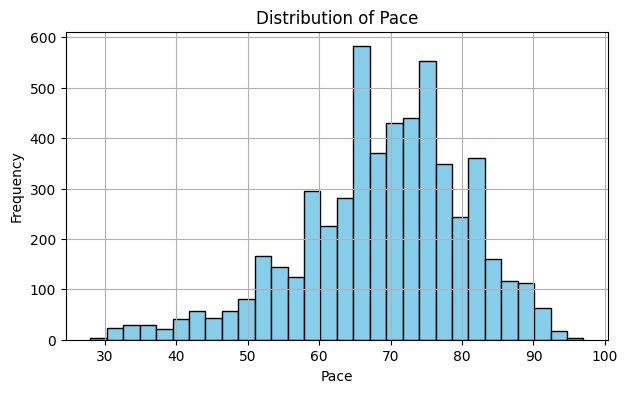

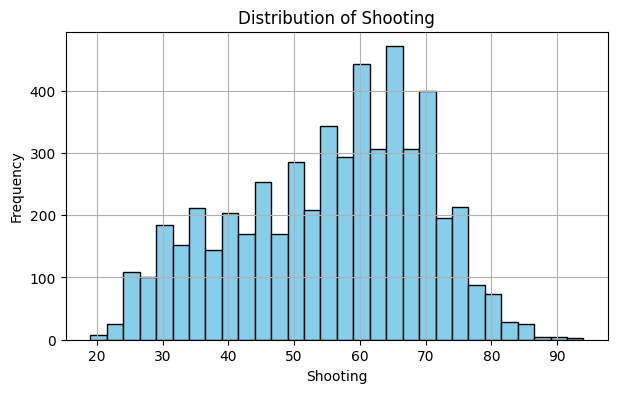

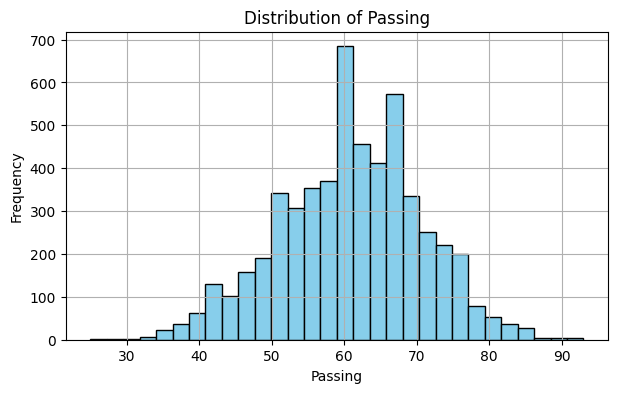

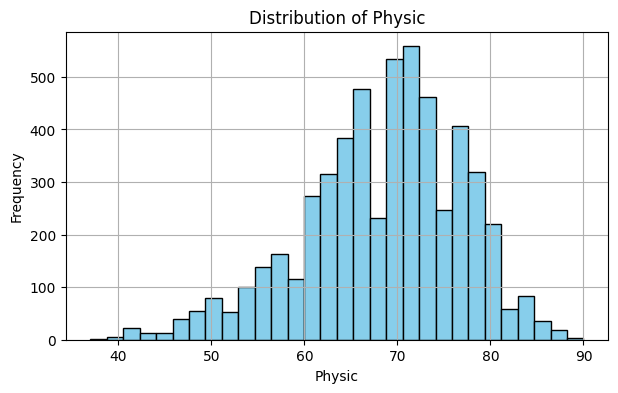

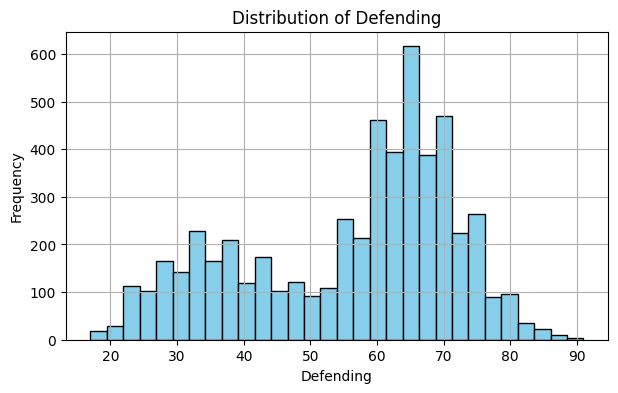

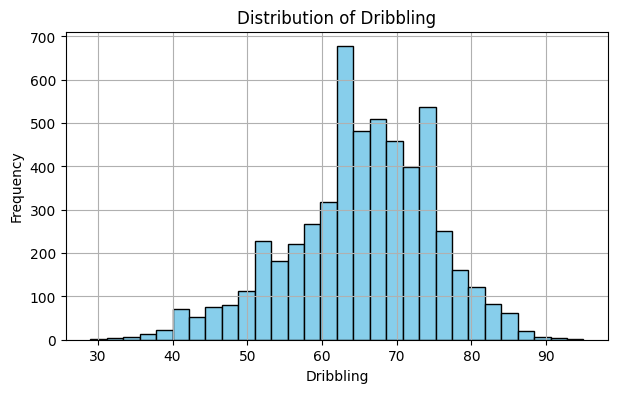

In [8]:
# Function to create histograms for specified columns
def create_histograms(df, columns, bins=30, color='skyblue', edgecolor='black', figsize=(7, 4)):
    for column in columns:
        plt.figure(figsize=figsize)
        plt.hist(df[column].dropna(), bins=bins, color=color, edgecolor=edgecolor)
        plt.title(f'Distribution of {column.capitalize()}', fontsize=12)
        plt.xlabel(column.capitalize(), fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.grid(True)
        plt.show()

# List of columns to plot
columns_to_plot = ['pace', 'shooting', 'passing', 'physic','defending','dribbling']
create_histograms(df, columns_to_plot)

To address missing values in the columns 'pace,' 'shooting,' 'passing,' 'dribbling,' 'physic,' and 'defending,' KNN imputation is not ideal due to the presence of outliers and skewed distributions, particularly in the 'shooting' and 'pace' columns. Therefore, the decision has been made to use median imputation, which is more robust in handling such data characteristics.

In [9]:
def impute_missing_with_median(df, columns):
    """
    Fills missing values in specified columns with the median of each column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): The list of column names to apply median imputation.
    
    Returns:
    pd.DataFrame: The DataFrame with imputed values.
    """
    for column in columns:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    return df

# List of columns to impute
columns_to_impute = ['pace', 'shooting', 'passing', 'dribbling', 'defending','physic']
df = impute_missing_with_median(df, columns_to_impute)

After addressing data issues such as unifying numeric values, cleaning text data, and handling missing values, we can proceed with feature engineering. This process will help us reduce dimensionality and extract more essential features.

1. Instead of using the weight and height columns, calculate BMI and drop the previous two columns.
This revision clarifies that BMI should be calculated from weight and height, and the original weight and height columns should be removed from the dataset.
2. Age category: This ratio reflects a player’s performance relative to their age, helping to identify both experienced players and those who are exceptional for their age. It highlights players who may be more seasoned or those who are performing exceptionally well at a younger age.
3. Age-Potential Ratio: This feature measures a player’s potential relative to their current age, which highlights younger players who have high potential for future development.
The revised text makes it clear that this ratio focuses on younger players with significant future potential.
4. Skill Score: This is an average of the player’s key skill ratings, providing a general indicator of their overall ability across various aspects of play.
This revision clarifies that the skill score is an average of key skill ratings, giving an overall picture of the player's abilities.
- P.S. such columns 'weight_kg','height_cm','pace','shooting','passing','dribbling','defending', will be removed after EDA before performe most importert feature.

In [10]:
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
# Experience Level
# Define age brackets
def categorize_age(age):
    if age < 23:
        return 'Young'
    elif 23 <= age < 30:
        return 'Prime'
    else:
        return 'Veteran'

# Apply categorization
df['age_category'] = df['age'].apply(categorize_age)
# Age-Potential Ratio
df['potential_chance'] = df['potential'] / df['age']
# Skill score
df['skill_score'] = df[['pace', 'shooting', 'passing', 'dribbling', 'defending']].mean(axis=1)

In [11]:
statistical_summary = df.describe()
statistical_summary

,sofifa_id,overall,potential,age,height_cm,weight_kg,club_contract_valid_until,pace,shooting,passing,dribbling,defending,physic,value_eur,has_tags,bmi,potential_chance,skill_score
count,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5969.000000,5.969000e+03,5969.000000,5969.000000,5969.000000,5969.000000
mean,224226.831798,69.526219,72.568102,26.919082,181.135366,75.451164,2022.764282,69.049254,55.319652,60.893952,65.301893,56.418831,68.500586,5.200072e+06,0.118948,22.967627,2.779734,61.396716
std,26424.473159,6.265011,6.342051,4.320479,6.887630,7.062461,1.281398,11.095064,13.936651,9.357867,9.234091,15.180653,8.133379,1.174249e+07,0.323754,1.327143,0.587367,6.882076
min,41.000000,48.000000,53.000000,17.000000,156.000000,53.000000,2021.000000,28.000000,19.000000,25.000000,29.000000,17.000000,37.000000,2.500000e+04,0.000000,17.817494,1.500000,36.800000
25%,208455.000000,65.000000,68.000000,24.000000,176.000000,70.000000,2022.000000,64.000000,46.000000,55.000000,61.000000,45.000000,64.000000,7.750000e+05,0.000000,22.093170,2.322581,57.000000
50%,228834.000000,69.000000,72.000000,27.000000,181.000000,75.000000,2023.000000,70.000000,58.000000,61.000000,66.000000,61.000000,69.000000,1.600000e+06,0.000000,22.985398,2.680000,62.400000
75%,243007.000000,73.000000,77.000000,30.000000,186.000000,80.000000,2024.000000,76.000000,65.000000,67.000000,71.000000,67.000000,74.000000,3.700000e+06,0.000000,23.808690,3.166667,65.600000
max,264481.000000,93.000000,95.000000,43.000000,203.000000,103.000000,2031.000000,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000,1.940000e+08,1.000000,28.959000,5.055556,82.000000


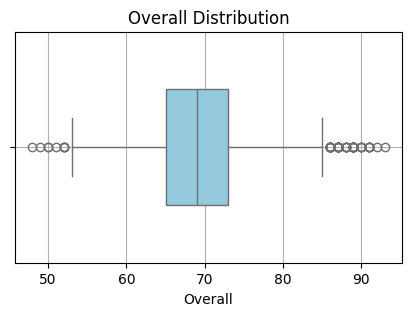

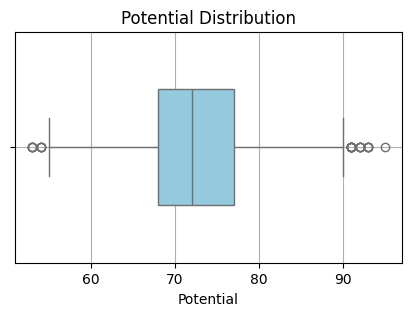

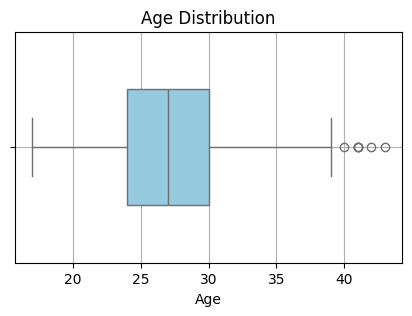

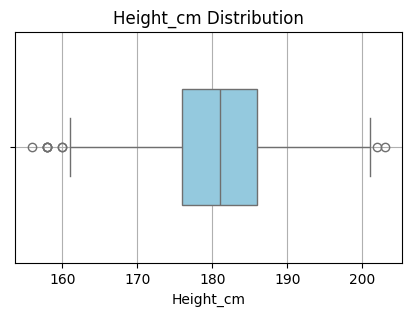

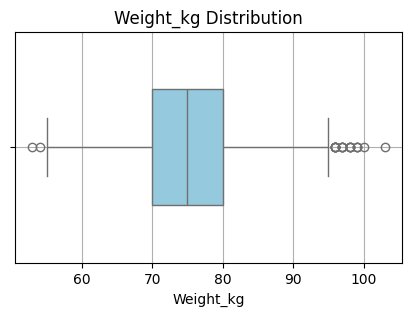

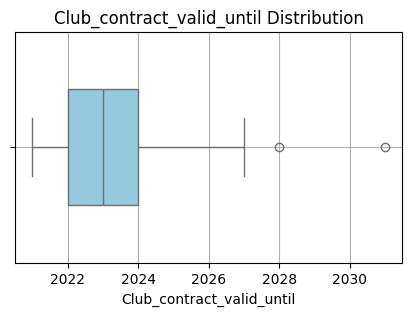

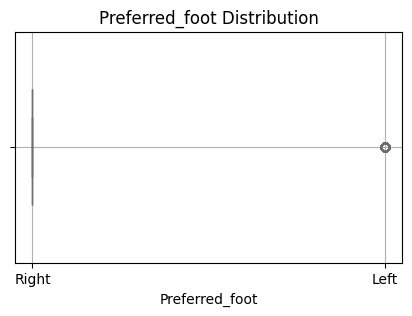

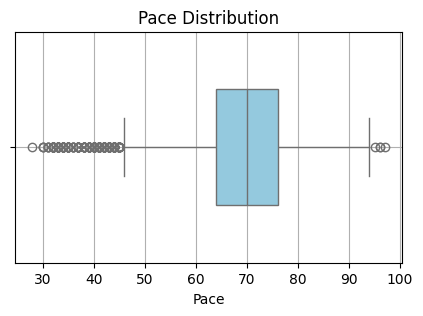

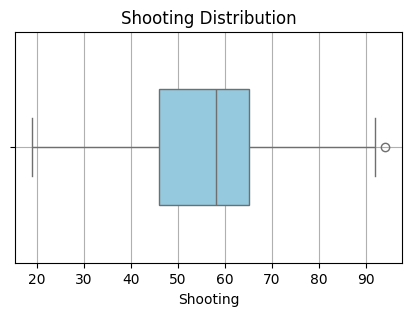

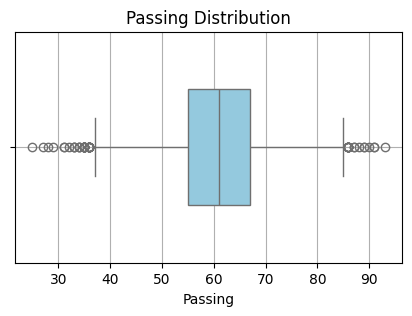

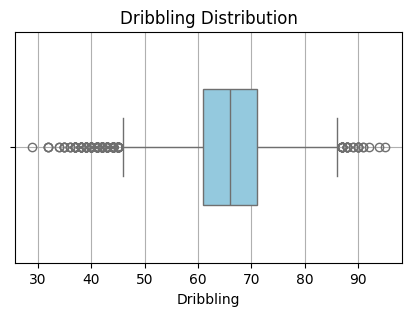

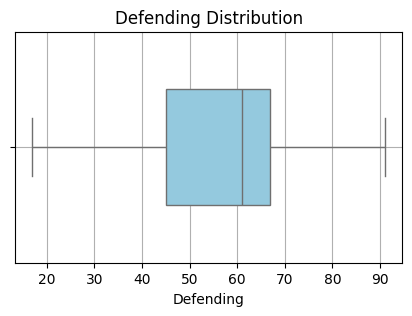

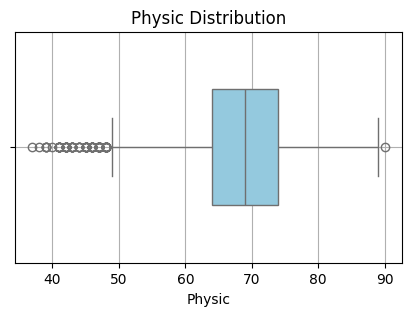

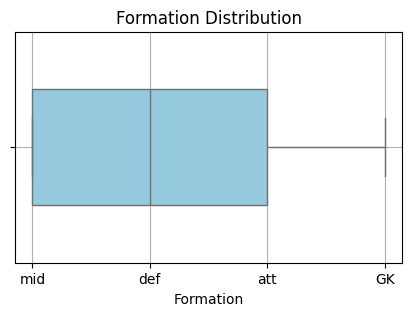

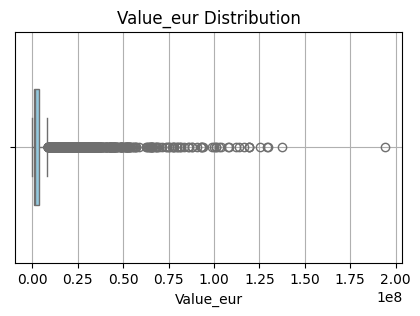

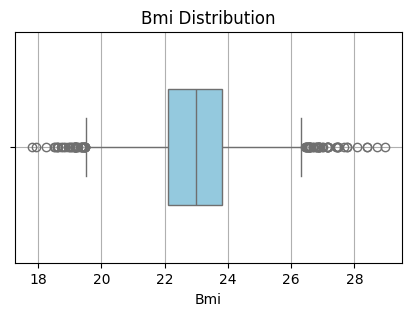

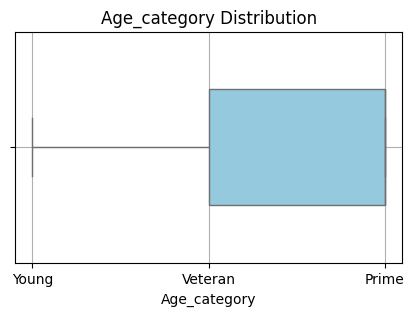

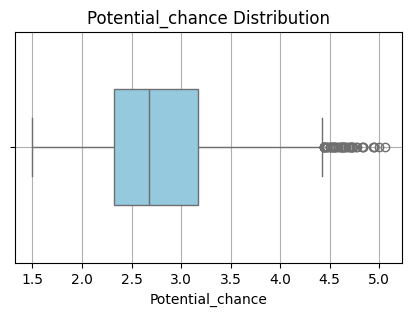

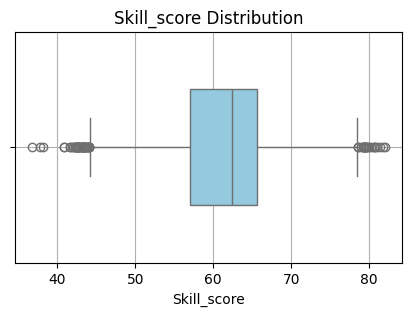

In [12]:
# Function to create boxplots for specified columns
def create_boxplot(df, columns, figsize=(5, 3)):
    for column in columns:
        plt.figure(figsize=figsize)
        sns.boxplot(x=df[column], color='skyblue', width=0.5)
        plt.title(f'{column.capitalize()} Distribution', fontsize=12)
        plt.xlabel(column.capitalize(), fontsize=10)
        plt.grid(True)
        plt.show()

# List of columns to plot
columns_to_plot = [
 'overall',
 'potential',
 'age',
 'height_cm',
 'weight_kg',
 'club_contract_valid_until',
 'preferred_foot',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'formation',
 'value_eur',
 'bmi',
 'age_category',
 'potential_chance',
 'skill_score']
# Call the function with your DataFrame and columns
create_boxplot(df, columns_to_plot)


statistical_summary:
- The average overall rating is 69.53, with ratings ranging from 48 (lowest) to 93 (highest). Ratings are fairly spread out. 
- On average, players have a potential rating of 72.57. Potential ratings can vary significantly, with a standard deviation indicating variability in potential.
- The average age of players is around 27 years, with a reasonable spread from young (17) to older players (43).
- The average physical attribute rating is 68.50, with a wide range indicating diversity in physical attributes.
- The average market value is significantly higher due to high variability and outliers. The large standard deviation reflects extreme values. 
- A small proportion of players have tags (12%).
- The average BMI is 22.97, indicating a generally healthy body weight for the 
- The age category analysis shows that most players fall into the "Prime" or "Veteran" categories. This distribution may impact player prices, as younger players, who have a higher chance to reach their potential, are often more in demand.
- The average skill score is 61.40, with a wide range showing differences in overall skill.
General Insights:
- Diversity in Values: There is considerable variability in market value (value_eur), physical attributes (physic), and skill scores (skill_score).
- Age Distribution: The average age is 27 years, suggesting a mix of experienced and relatively younger players.
- Contract Validity: Contracts are valid for a relatively short term on average.

Such a statistical overview allows for a better understanding the data.

Analysis of the Relationship Between League, Overall Rating, and Market Value

This analysis aims to explore the relationship between the league in which players participate, their overall rating, and their market value. We will investigate whether there are significant correlations or dependencies among these variables, considering if players with similar or different overall ratings show varying market values within the same league.

In [13]:
# Scatter Plot: Overall Rating vs Market Value colored by League Name
fig_scatter = px.scatter(
    df,
    x='overall',
    y='value_eur',
    color='league_name',
    title='Overall Rating vs Market Value by League',
    labels={'overall': 'Overall Rating', 'value_eur': 'Market Value (EUR)', 'league_name': 'League Name'},
    opacity=0.7
)
fig_scatter.update_layout(
    xaxis_title='Overall Rating',
    yaxis_title='Market Value (EUR)',
    title_x=0.5,
    legend_title='League Name'
)
fig_scatter.show()

Observations:
- There is no consistent dependency between the overall rating, market value (value_eur), and league. For example, players within the same league can exhibit a wide range of market values, with some exceeding €100 million and others falling below €70 million. Similarly, players in the same league can have significantly varied overall ratings and market values.
- This difference can be attributed to the varying number of players within each league.

Starting the research from a broad perspective—League level → Club level → Personal characteristics of players—I encountered some confusion. 

As someone from Ukraine who is not deeply involved in football, I am aware of the negative perceptions surrounding the Ukrainian league :)

To investigate, I first extracted data for the top 10 leagues based on the highest average `value_eur` per player. The leagues included must have crucial characteristics to meet this requirement. However, a potential issue is that the number of players in each league varies. 
More relevant results can be obtained at the club level, but further details are available in the comprehensive EDA file.

In [14]:
# Assuming df is your DataFrame and the previous operations have been performed:
league_stats = df.groupby('league_name').agg(
    mean_value_eur=('value_eur', 'mean'),
    player_count=('value_eur', 'size')
).reset_index()

# Calculate mean value per player
league_stats['mean_value_per_player'] = league_stats['mean_value_eur'] / league_stats['player_count']

# Sort by mean value per player and select the top 10 leagues
top_leagues = league_stats.sort_values(by='mean_value_per_player', ascending=False)

fig = px.bar(
    top_leagues, 
    x='mean_value_per_player', 
    y='league_name', 
    orientation='h', 
    title='Top 10 Leagues by Mean Value Per Player',
    labels={'mean_value_per_player': 'Mean Value Per Player (€)', 'league_name': 'League Name'},
    color='mean_value_per_player',
    color_continuous_scale='Viridis'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Mean Value Per Player (€)",
    yaxis_title="League Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig.show()

league_player_counts = df.groupby('league_name').agg(player_count=('sofifa_id', 'count')).reset_index()

# Sort the leagues by the number of players in descending order and select the top 10
top_leagues_by_player_count = league_player_counts.sort_values(by='player_count', ascending=False).head(15)

fig = px.bar(
    top_leagues_by_player_count, 
    x='player_count', 
    y='league_name', 
    orientation='h', 
    title='Top 10 Leagues by Number of Players',
    labels={'player_count': 'Number of Players', 'league_name': 'League Name'},
    color='player_count',
    color_continuous_scale='Blues'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Number of Players",
    yaxis_title="League Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig.show()

league_skill_score = df.groupby('league_name').agg(avg_skill_score=('skill_score', 'mean')).reset_index()

# Sort the leagues by the average potential_chance in descending order and select the top 10
top_leagues_by_skill_score = league_skill_score.sort_values(by='avg_skill_score', ascending=False).head(10)

fig = px.bar(
    top_leagues_by_skill_score, 
    x='avg_skill_score', 
    y='league_name', 
    orientation='h', 
    title='Top 10 Leagues by Average Potential Chance',
    labels={'avg_skill_score': 'Average Skill Score', 'league_name': 'League Name'},
    color='avg_skill_score',
    color_continuous_scale='Viridis'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Average Skill Score",
    yaxis_title="League Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig.show()

Summary:
- The top 10 leagues with the highest average player value are: **Ukrainian Premier League**, Hungarian Nemzeti Bajnokság I, Croatian Prva HNL, Russian Premier League, UAE Arabian Gulf League, Czech Republic Gambrinus Liga, Cypriot First Division, English Premier League, Greek Super League, and Spain's Primera División.
- The top 10 leagues by the number of players are: USA Major League Soccer, Argentina Primera División, Spain's Primera División, French Ligue 1, English Premier League, Japanese J. League Division 1, Italian Serie A, Turkish Süper Lig, Portuguese Liga ZON SAGRES, and Campeonato Brasileiro Série A.

#### Top 10 Leagues based on average potential and potential chance

**Objective:**
To identify the top 10 leagues based on the average values for two key metrics: `potential` and `potential_chance`.

In [15]:
# Calculate the average potential and potential chance for each league
league_stats = df.groupby('league_name').agg(
    avg_potential=('potential', 'mean'),
    avg_potential_chance=('potential_chance', 'mean')
).reset_index()

# Sort the leagues by average potential and potential chance, and select the top 10
top_10_leagues_by_potential = league_stats.sort_values(by='avg_potential', ascending=False).head(10)
top_10_leagues_by_potential_chance = league_stats.sort_values(by='avg_potential_chance', ascending=False).head(10)

# Top 10 Leagues by Average Potential
fig1 = px.bar(
    top_10_leagues_by_potential,
    x='avg_potential',
    y='league_name',
    orientation='h',
    title='Top 10 Leagues by Average Potential',
    labels={'avg_potential': 'Average Potential', 'league_name': 'League Name'},
    color='avg_potential',
    color_continuous_scale='Blues'
)

# Top 10 Leagues by Average Potential Chance
fig2 = px.bar(
    top_10_leagues_by_potential_chance,
    x='avg_potential_chance',
    y='league_name',
    orientation='h',
    title='Top 10 Leagues by Average Potential Chance',
    labels={'avg_potential_chance': 'Average Potential Chance', 'league_name': 'League Name'},
    color='avg_potential_chance',
    color_continuous_scale='Reds'
)
fig1.show()
fig2.show()

Considering the metrics of potential and potential chance, the English Premier League ranks highest in terms of average potential. In contrast, the Ukrainian Premier League leads in potential chance. This is particularly encouraging and noteworthy.

I decided to dive deeper into the characteristics to gain a more detailed understanding. This involves a thorough examination of the key features and metrics to uncover valuable insights and trends.

In [16]:
ukrainian_premier_league_df = df[df['league_name'] == 'Ukrainian Premier League']
ukrainian_premier_league_df.describe()

,sofifa_id,overall,potential,age,height_cm,weight_kg,club_contract_valid_until,pace,shooting,passing,dribbling,defending,physic,value_eur,has_tags,bmi,potential_chance,skill_score
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000
mean,231110.818182,74.590909,79.681818,25.454545,180.454545,76.090909,2023.727273,75.227273,58.272727,65.136364,69.181818,59.409091,66.636364,9.037500e+06,0.090909,23.374926,3.265158,65.445455
std,27397.624505,3.389888,4.133330,5.179881,7.235674,6.704008,1.453463,7.204045,15.787825,9.958464,10.069456,16.612271,8.150638,7.951130e+06,0.294245,1.692191,0.720267,6.595794
min,142902.000000,68.000000,73.000000,18.000000,166.000000,67.000000,2021.000000,64.000000,22.000000,38.000000,45.000000,29.000000,52.000000,6.250000e+05,0.000000,20.679012,2.027027,49.000000
25%,223093.000000,72.250000,76.250000,21.250000,175.500000,71.250000,2023.000000,70.000000,47.500000,59.500000,63.750000,45.500000,59.250000,3.650000e+06,0.000000,22.252009,2.558954,61.700000
50%,239535.000000,74.500000,79.500000,23.500000,180.000000,76.000000,2023.000000,75.000000,64.500000,65.500000,69.000000,65.500000,69.000000,5.250000e+06,0.000000,23.190853,3.342391,65.700000
75%,246775.250000,76.000000,82.750000,29.750000,185.250000,80.000000,2025.000000,80.500000,69.750000,72.000000,78.000000,72.750000,72.750000,1.525000e+07,0.000000,24.352377,3.806818,69.700000
max,258781.000000,81.000000,86.000000,37.000000,197.000000,92.000000,2026.000000,88.000000,76.000000,78.000000,86.000000,79.000000,79.000000,3.350000e+07,1.000000,27.450605,4.555556,75.200000


In [17]:
french_premier_league_df = df[df['league_name'] == 'French Ligue 1']
french_premier_league_df.describe()

,sofifa_id,overall,potential,age,height_cm,weight_kg,club_contract_valid_until,pace,shooting,passing,dribbling,defending,physic,value_eur,has_tags,bmi,potential_chance,skill_score
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.000000,220.000000,220.000000
mean,222035.518182,75.345455,78.940909,25.900000,181.231818,74.645455,2023.418182,70.463636,58.631818,66.154545,70.804545,60.527273,70.745455,1.279727e+07,0.181818,22.699415,3.145717,65.316364
std,25375.073230,4.498475,4.424007,4.388549,7.060462,7.169935,1.149801,12.746332,14.460966,8.634841,8.614683,16.998635,7.830903,2.084381e+07,0.386574,1.377124,0.616825,6.424433
min,124375.000000,65.000000,69.000000,17.000000,164.000000,58.000000,2022.000000,32.000000,27.000000,39.000000,45.000000,19.000000,45.000000,4.250000e+05,0.000000,19.444444,1.945946,47.200000
25%,207797.000000,73.000000,76.000000,23.000000,176.000000,69.750000,2022.000000,65.000000,48.000000,61.000000,66.000000,48.500000,67.000000,3.075000e+06,0.000000,21.714832,2.714286,62.000000
50%,227761.000000,75.000000,79.000000,25.000000,181.000000,73.000000,2023.000000,71.500000,58.500000,67.000000,72.000000,67.000000,70.000000,6.500000e+06,0.000000,22.683626,3.113571,65.400000
75%,239699.750000,78.000000,82.000000,29.000000,187.000000,80.000000,2024.000000,78.000000,70.000000,72.000000,76.000000,73.000000,76.250000,1.500000e+07,0.000000,23.629490,3.576299,69.450000
max,262908.000000,93.000000,95.000000,37.000000,197.000000,93.000000,2026.000000,97.000000,92.000000,91.000000,95.000000,89.000000,86.000000,1.940000e+08,1.000000,26.528510,4.823529,80.600000


#### Analysis of Player Characteristics in the French and Ukrainian Leagues

The total number of players is significantly higher in the French league (Spoiler: the most valuable player is from this league), with only minor differences observed in the remaining parameters. Notably, the potential chance for the Ukrainian Premier League is approximately 0.12 points higher.

After examining these characteristics, we observe that the mean `potential_chance` (the likelihood for players to reach their maximum potential) is nearly the same across both leagues. Additionally, the mean age of players in the French league is approximately 0.5 years older, which could also influence the `potential_chance`. Despite this, the overall `potential` is about 5 points higher in the French league, and `potential` itself is around 0.7 points higher.

Similarly, there is no significant difference in the `skill_score` (a metric encompassing various playing skills like defense, attack, etc.). This suggests that the metrics were calculated correctly and are relevant to the overall statistical estimation. Based on this analysis, I will reconsider my initial views regarding the Ukrainian league :)

Let's shift our focus to the club level.

In [18]:
club_stats = df.groupby('club_name').agg(
    avg_potential=('potential', 'mean'),
    avg_overall=('overall', 'mean'),
    avg_potential_chance=('potential_chance', 'mean'),
    avg_skill_score=('skill_score', 'mean'),
    
    player_count=('club_name', 'size')
).reset_index()

# Find the top 10 clubs for potential
top_clubs_potential = club_stats.sort_values(by='avg_potential', ascending=False).head(10)

fig_potential = px.bar(
    top_clubs_potential,
    x='avg_potential',
    y='club_name',
    title='Top 10 Clubs by Potential',
    labels={'avg_potential': 'Average Potential', 'club_name': 'Club Name'},
    color='avg_potential',
    color_continuous_scale='Blues',
    orientation='h'
)
# Update layout for better readability
fig_potential.update_layout(
    xaxis_title="Average Potential",
    yaxis_title="Club Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig_potential.show()

# Find the top 10 clubs for overall rating
top_clubs_overall = club_stats.sort_values(by='avg_overall', ascending=False).head(10)

fig_overall = px.bar(
    top_clubs_overall,
    x='avg_overall',
    y='club_name',
    title='Top 10 Clubs by Overall Rating',
    labels={'avg_overall': 'Average Overall Rating', 'club_name': 'Club Name'},
    color='avg_overall',
    color_continuous_scale='Reds',
    orientation='h'
)

# Update layout for better readability
fig_overall.update_layout(
    xaxis_title="Average Overall Rating",
    yaxis_title="Club Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig_overall.show()

# Find the top 10 clubs for potential_chance
top_clubs_potential_chance = club_stats.sort_values(by='avg_potential_chance', ascending=False).head(10)

fig_potential_chance = px.bar(
    top_clubs_potential_chance,
    x='avg_potential_chance',
    y='club_name',
    title='Top 10 Clubs by Potential Chance',
    labels={'avg_potential_chance': 'Average Potential Chance', 'club_name': 'Club Name'},
    color='avg_potential_chance',
    color_continuous_scale='Blues',
    orientation='h'
)

fig_potential_chance.update_layout(
    xaxis_title="Average Potential Chance",
    yaxis_title="Club Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)

fig_potential_chance.show()

# Find the top 10 clubs for skill score
top_clubs_skill_score = club_stats.sort_values(by='avg_skill_score', ascending=False).head(10)

fig_skill_score = px.bar(
    top_clubs_skill_score,
    x='avg_skill_score',
    y='club_name',
    title='Top 10 Clubs by Skill Score',
    labels={'avg_skill_score': 'Average Skill Score', 'club_name': 'Club Name'},
    color='avg_skill_score',
    color_continuous_scale='Purples',
    orientation='h'
)

fig_skill_score.update_layout(
    xaxis_title="Average Skill Score",
    yaxis_title="Club Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig_skill_score.show()

The overview of clubs provides more accurate insights, as the number of players in each club is consistent. Paris Saint-Germain (PSG) emerges as the top club overall, while FC Red Bull Salzburg leads in potential chance (the likelihood of players reaching their full potential). However, it's important to note that the differences in stats among the top 10 clubs are not particularly significant. Additionally, features like skill_score, which offers a weighted skill rating for the team, demonstrate the usefulness of such engineered features in evaluating club performance.

Top most valuable players in the dataset

In [19]:
top_players = df.sort_values(by='value_eur', ascending=False).head(10)

fig = px.bar(
    top_players, 
    x='value_eur', 
    y='short_name', 
    color='club_name',
    orientation='h',
    title='Top 10 Players by Market Value (€)',
    labels={'value_eur': 'Market Value (€)', 'short_name': 'Player Name', 'club_name': 'Club Name'},
    color_continuous_scale='Magma'
)

fig.update_layout(
    xaxis_title="Market Value (€)",
    yaxis_title="Player Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig.show()

- According to the analysis, the most expensive player is Kylian Mbappé, playing for Paris Saint-Germain (PSG), with a valuation of €194M.
- In second place is Erling Haaland, playing for Borussia Dortmund, valued at €137M.
- The third most valuable player is Harry Kane, representing Tottenham Hotspur, with a valuation of €129.5M.

Notably, there is a significant difference in value between Mbappé and Haaland. This disparity presents an opportunity for further investigation to understand the factors influencing player valuation and pricing strategies.

In [20]:
player_name = df[['short_name',
                  'value_eur',
                    'overall',
                    'potential',
                    'age',
                    'club_name',
                    'club_contract_valid_until',
                    'preferred_foot',
                    'bmi',
                    'formation',
                    'age_category',
                    'potential_chance',
                    'skill_score'
                  ]].nlargest(15,['value_eur']).set_index('short_name')
player_name

,value_eur,overall,potential,age,club_name,club_contract_valid_until,preferred_foot,bmi,formation,age_category,potential_chance,skill_score
short_name,,,,,,,,,,,,
K. Mbappé,194000000.0,91,95,22,Paris Saint-Germain,2022,Right,22.038401,att,Young,4.318182,78.6
E. Haaland,137500000.0,88,93,20,Borussia Dortmund,2024,Left,24.976087,att,Young,4.650000,74.0
H. Kane,129500000.0,90,90,27,Tottenham Hotspur,2024,Right,25.181077,att,Prime,3.333333,74.8
Neymar Jr,129000000.0,91,91,29,Paris Saint-Germain,2025,Right,22.204082,att,Prime,3.137931,78.2
K. De Bruyne,125500000.0,91,91,30,Manchester City,2025,Right,21.366869,mid,Veteran,3.033333,81.4
G. Donnarumma,119500000.0,89,93,22,Paris Saint-Germain,2026,Right,23.427738,GK,Young,4.227273,63.2
F. de Jong,119500000.0,87,92,24,FC Barcelona,2026,Right,22.839506,mid,Prime,3.833333,80.0
R. Lewandowski,119500000.0,92,92,32,FC Bayern München,2023,Right,23.666910,att,Veteran,2.875000,75.8
J. Sancho,116500000.0,87,91,21,Manchester United,2026,Right,23.456790,mid,Young,4.333333,73.2


Summary of Top 15 Football Players:
- The analysis of the top 15 football players reveals that most prefer using their right foot. Kylian Mbappé is the most valuable player, valued at €194M, with an overall rating of 91 and a potential of 95. Playing for Paris Saint-Germain, he is also one of the youngest players at just 22 years old. His high potential and young age contribute to his high value. Mbappé is the youngest right-footed player among the top and has a high potential chance, which, along with his exceptional skill score, makes him the most valuable player on the list.
- Kevin De Bruyne has the highest skill score among the top 15 players. However, his potential chance is slightly lower due to his age of 30, compared to Mbappé's 22 years.
- Erling Haaland and Harry Kane are the second and third most valuable players, valued at €137.5M and €129.5M, respectively. Haaland, who is 20 years old and has a potential of 93, is a highly promising talent. Notably, Haaland is the only left-footed player among the top 15.
- Neymar Jr and Kevin De Bruyne, valued around €129M and €125.5M respectively, are among the older players in this group but maintain high overall ratings of 91. They play for top clubs Paris Saint-Germain and Manchester City.
- Gianluigi Donnarumma and Jadon Sancho are also significant due to their high potential ratings (93 and 91, respectively) at a young age, indicating future growth and sustained value.
- Robert Lewandowski, Joshua Kimmich, and Bruno Fernandes are key figures at their clubs, FC Bayern München and Manchester United, with values ranging from €108M to €119.5M.
- Jan Oblak and Rúben Dias are strong defensive players, valued between €102.5M and €112M, and make substantial contributions to Atlético de Madrid and Manchester City.
- Rúben Dias has the highest club contract value, which may also influence his overall value.
- Although Haaland is one of the more experienced players, he has a skill score of 74.0, which is among the lowest for the top 15.
- Robert Lewandowski, despite having the highest overall rating, is 32 years old, making him the oldest player in the group. His age impacts his potential, resulting in a lower potential chance.

P.S. To confirm these trends, the most important features will be identified using machine learning techniques at the end of the investigation.

A good question to ask is: Who is the worst player? To answer this, let's identify the top 10 worst players based on value_eur. Since this metric reflects the quality of a player's stats, it serves as a reliable indicator of player performance.

In [21]:
top_players = df.sort_values(by='value_eur', ascending=True).head(10)

fig = px.bar(
    top_players, 
    x='value_eur', 
    y='short_name', 
    color='club_name',
    orientation='h',
    title='Top 10 Players by Market Value (€)',
    labels={'value_eur': 'Market Value (€)', 'short_name': 'Player Name', 'club_name': 'Club Name'},
    color_continuous_scale='Magma'
)

fig.update_layout(
    xaxis_title="Market Value (€)",
    yaxis_title="Player Name",
    title_x=0.5,
    yaxis=dict(categoryorder='total ascending')
)
fig.show()

The player with the lowest value_eur is Liu Zhenli, who plays for Qingdao FC.

In [22]:
player_name = df[['short_name',
                  'value_eur',
                    'overall',
                    'potential',
                    'age',
                    'club_name',
                    'club_contract_valid_until',
                    'preferred_foot',
                    'bmi',
                    'formation',
                    'age_category',
                    'potential_chance',
                    'skill_score'
                  ]].nsmallest(15,['value_eur']).set_index('short_name')
player_name

,value_eur,overall,potential,age,club_name,club_contract_valid_until,preferred_foot,bmi,formation,age_category,potential_chance,skill_score
short_name,,,,,,,,,,,,
Liu Zhenli,25000.0,58,58,36,Qingdao FC,2021,Right,25.773196,GK,Veteran,1.611111,63.2
S. Roy,35000.0,58,58,34,NorthEast United FC,2022,Right,23.888441,GK,Veteran,1.705882,63.2
B. Murphy,35000.0,61,61,38,Waterford FC,2021,Right,24.784258,GK,Veteran,1.605263,63.2
Huang Xiyang,35000.0,54,54,36,Chongqing Liangjiang Athletic,2022,Right,22.093170,mid,Veteran,1.500000,53.6
Yao Hanlin,45000.0,56,56,36,Wuhan FC,2021,Right,19.591837,mid,Veteran,1.555556,51.6
A. Edathodika,45000.0,56,56,34,Jamshedpur FC,2022,Right,24.074074,def,Veteran,1.647059,40.8
B. Singh,45000.0,53,53,34,SC East Bengal FC,2022,Right,23.148148,att,Veteran,1.558824,44.8
S. Lukić,50000.0,63,63,41,Varbergs BoIS FC,2021,Right,24.685330,GK,Veteran,1.536585,63.2
Li Shuai,50000.0,63,63,38,Shanghai Shenhua FC,2021,Right,23.624795,GK,Veteran,1.657895,63.2


Key Insights:
- Veteran Players: All players (except of one) in this group fall into the Veteran category, indicating they are in the later stages of their careers.
- Age Demographics: The majority of these players are over 30 years old, reflecting their veteran status.
- Preferred Foot: A consistent preference for playing with the right foot is observed across all players.
- Performance Metrics: The players exhibit relatively low potential and other key stats, which correlates with their lower market value (value_eur).

These factors collectively explain the reduced market valuation of these players.

Let's check preferences regarding foot usage.

                sofifa_id
preferred_foot           
Left                 1462
Right                4507


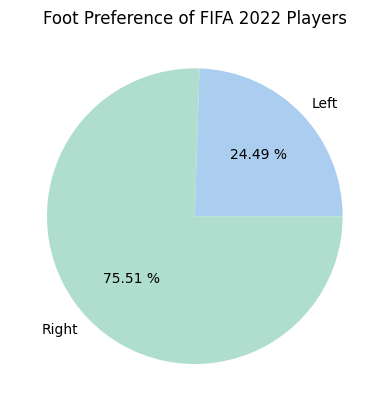

In [23]:
print(df.groupby(['preferred_foot']).count()[['sofifa_id']])

left = df.loc[df['preferred_foot'] == 'Left'].count().iloc[0]
right = df.loc[df['preferred_foot'] == 'Right'].count().iloc[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#afdecf']

plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f %%')
plt.title('Foot Preference of FIFA 2022 Players')

plt.show()

Most players prefer using their right foot, with 75.51% favoring it compared to 24.49% who prefer their left foot. It would be interesting to compare the commulative statistics of potential and skill score for players with right-foot versus left-foot preferences.

Right Foot Preference Mean Statistics:
potential           72.549811
skill_score         61.168760
potential_chance     2.776563
dtype: float64

Left Foot Preference Mean Statistics:
potential           72.624487
skill_score         62.099453
potential_chance     2.789509
dtype: float64


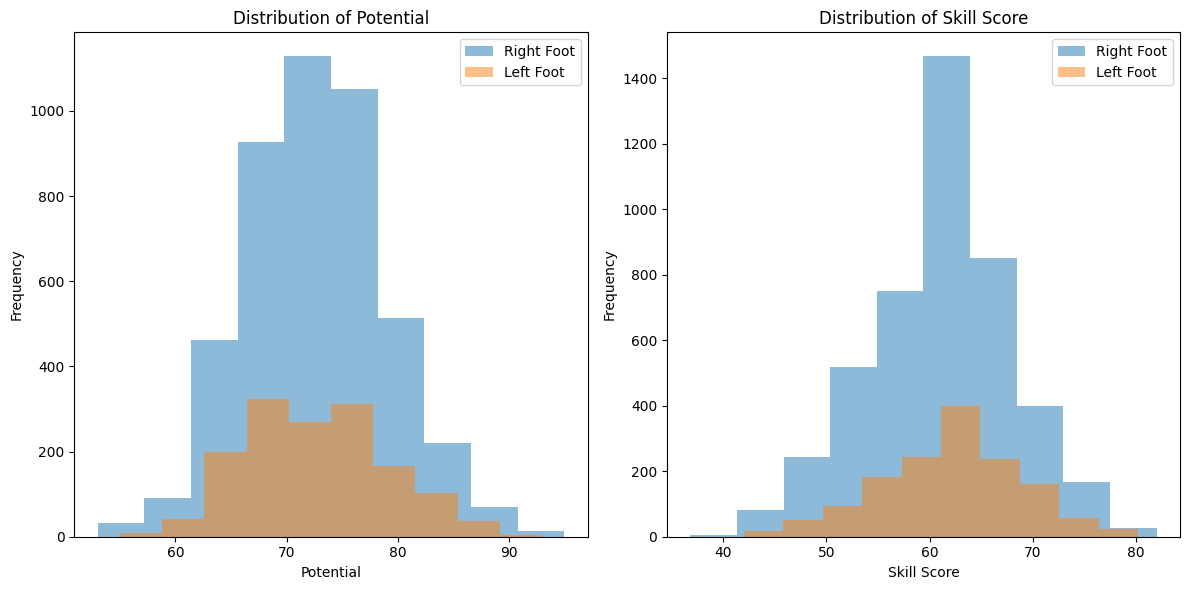

In [24]:
# Separate data by foot preference
right_foot = df[df['preferred_foot'] == 'Right']
left_foot = df[df['preferred_foot'] == 'Left']

# Calculate mean for right-foot players
right_foot_mean = right_foot[['potential', 'skill_score', 'potential_chance']].mean()

# Calculate mean for left-foot players
left_foot_mean = left_foot[['potential', 'skill_score', 'potential_chance']].mean()

print("Right Foot Preference Mean Statistics:")
print(right_foot_mean)
print("\nLeft Foot Preference Mean Statistics:")
print(left_foot_mean)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(right_foot['potential'], alpha=0.5, label='Right Foot', bins=10)
plt.hist(left_foot['potential'], alpha=0.5, label='Left Foot', bins=10)
plt.title('Distribution of Potential')
plt.xlabel('Potential')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(right_foot['skill_score'], alpha=0.5, label='Right Foot', bins=10)
plt.hist(left_foot['skill_score'], alpha=0.5, label='Left Foot', bins=10)
plt.title('Distribution of Skill Score')
plt.xlabel('Skill Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

While the differences in mean values between right-footed and left-footed players are relatively small, left-footed players tend to have marginally higher potential, skill scores, and potential chances. These differences, though statistically noticeable, may not be substantial enough to significantly impact player evaluations in practical scenarios.

In [25]:
def plot_top_10(df, attribute):
    # Sort by the attribute and get the top 10 players
    top_10 = df.nlargest(10, attribute)

    fig = px.bar(
        top_10,
        x='short_name',
        y=attribute,
        title=f'Top 10 Players by {attribute.capitalize()}',
        labels={'short_name': 'Player', attribute: f'{attribute.capitalize()} Rating'},
        color=attribute,
        color_continuous_scale='Viridis'
    )
    fig.update_layout(
        xaxis_title='Player',
        yaxis_title=f'{attribute.capitalize()} Rating',
        title_x=0.5,
        xaxis_tickangle=-45
    )
    fig.show()

for attr in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
    plot_top_10(df, attr)

Among the players excelling in key performance categories, we have:

- **Pace:** Kylian Mbappé
- **Shooting:** Cristiano Ronaldo
- **Dribbling:** Lionel Messi
- **Defending:** Virgil van Dijk
- **Physical Attributes:** Casemiro

Each of these players stands out in their respective domains, significantly contributing to their teams' overall performance. Their standout attributes make them invaluable assets:

- **Kylian Mbappé** brings unmatched pace to the attack, exploiting spaces behind defenders and creating goal-scoring opportunities.
- **Cristiano Ronaldo** excels in finishing and goal-scoring, consistently converting chances into goals and being a reliable frontman.
- **Lionel Messi** provides creative playmaking and exceptional dribbling, maneuvering through tight spaces and orchestrating attacks.
- **Virgil van Dijk** offers defensive solidity and leadership, preventing opponents from scoring and maintaining a strong defensive line.
- **Casemiro** ensures physical dominance and midfield control, excelling in battles, winning aerial duels, and covering large areas of the pitch effectively.

**Possible MVP:**

Considering their contributions and impact on their teams, **Lionel Messi** could be a strong candidate for the MVP title. His unparalleled dribbling and creative playmaking, combined with his consistent performance and influence on the game, make him a standout choice.

Let's investigate why the most likely MVP player has a lower `value_eur` than the top player in the dataset.


In [26]:
players = ['L. Messi', 'K. Mbappé']
df_filtered = df[df['short_name'].isin(players)]
df_filtered

,sofifa_id,short_name,overall,potential,age,height_cm,weight_kg,club_name,league_name,club_contract_valid_until,...,defending,physic,formation,player_tags,value_eur,has_tags,bmi,age_category,potential_chance,skill_score
5427,158023,L. Messi,93,93,34,170,72,Paris Saint-Germain,French Ligue 1,2023,...,34.0,65.0,att,"Dribbler, Distance Shooter, FK Specialist, Acr...",78000000.0,1,24.913495,Veteran,2.735294,79.4
5694,231747,K. Mbappé,91,95,22,182,73,Paris Saint-Germain,French Ligue 1,2022,...,36.0,77.0,att,"Speedster, Dribbler, Acrobat, Clinical Finishe...",194000000.0,1,22.038401,Young,4.318182,78.6


Despite having a higher overall rating, Kylian Mbappé's potential is 2 points higher than Lionel Messi's. Additionally, Mbappé is classified as "Young," whereas Messi falls into the "Veteran" category, which limits Messi's potential.

In terms of skill score, the difference between the two players is minimal. However, Mbappé’s younger age—12 years younger than Messi—significantly contributes to his higher potential chance. Both players are in the same league and club, making this comparison particularly relevant.

In summary, Kylian Mbappé is the more valuable player due to his higher potential and younger age and in turn more potential to be MVP.

### Formation vs. Demand

The logic is as follows: the fewer players available in a specific position, the higher the demand for that role. This increased demand can drive up the `value_eur` of players who fill that position.


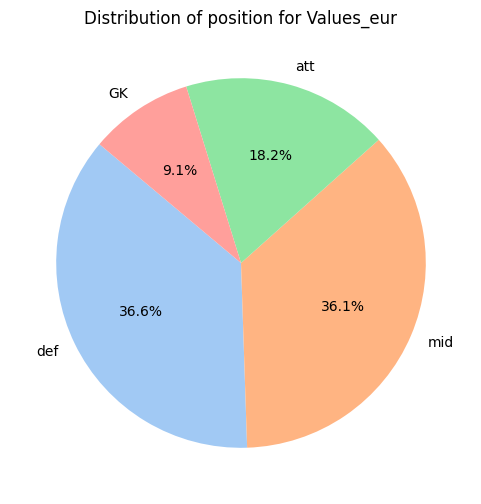

In [27]:
top_wage = df.sort_values(by='value_eur',ascending=False)
position_counts = top_wage['formation'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of position for Values_eur')
plt.show()

### Formation Statistics and Impact on Player Demand

- **Distribution of Formations:**
  - The distribution of formations reveals that the `def` (Defender) and `mid` (Midfielder) categories have similar percentages (36.6% and 36.1%, respectively). The `GK` (Goalkeeper) category has the lowest percentage, which could influence player demand. The `att` (Attacker) category comprises a moderate 18.2% of players. However, this distribution does not fully align with value trends.

- **Impact on Value_eur:**
  - Notably, among the top 10 players with the lowest `value_eur`, many are Goalkeepers (`GK`). Conversely, the top 4 players with the highest `value_eur` are predominantly from the Attacker (`att`) category. This suggests that players in attacking positions may experience higher demand and, consequently, higher market values, which influences overall player valuations.

So, the theory is partly supported by the data.

For additional insights, let's examine the top 10 players by weight and height in relation to their playing positions and formations.

In [28]:
# Top 10 players by weight
top_10_weight = df.nlargest(10, 'weight_kg')[['short_name', 'weight_kg','potential']]

# Top 10 players by height
top_10_height = df.nlargest(10, 'height_cm')[['short_name', 'height_cm','potential']]

fig_weight = px.bar(
    top_10_weight,
    x='weight_kg',
    y='short_name',
    orientation='h',
    title='Top 10 Players by Weight',
    labels={'weight_kg': 'Weight (kg)', 'short_name': 'Player'},
    color='potential',
    color_continuous_scale='Blues'
)

fig_height = px.bar(
    top_10_height,
    x='height_cm',
    y='short_name',
    orientation='h',
    title='Top 10 Players by Height',
    labels={'height_cm': 'Height (cm)', 'short_name': 'Player'},
    color='potential',
    color_continuous_scale='Greens'
)

fig_weight.show()
fig_height.show()

I'm not a football expert, but I'm impressed that it's possible to play at a professional level with a weight of 103 kg :)

Let’s identify the most influential features

In [29]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(columns=['weight_kg','height_cm','pace','shooting','passing','dribbling','defending','league_name','age','has_tags','short_name','player_tags','sofifa_id','preferred_foot'])

Imbalances in Features:
- Imbalances in features such as league_name and preferred_foot can indeed lead to overfitting and distort the importance of features in machine learning models. The remaining features, having been processed through feature engineering, are not as critical in this context.

Encoding for text data

In [30]:
df_cleaned['club_name'] = LabelEncoder().fit_transform(df_cleaned['club_name'])
df_cleaned['formation'] = LabelEncoder().fit_transform(df_cleaned['formation'])
df_cleaned['age_category'] = LabelEncoder().fit_transform(df_cleaned['age_category'])

In [31]:
df_cleaned

,overall,potential,club_name,club_contract_valid_until,physic,formation,value_eur,bmi,age_category,potential_chance,skill_score
1,67,80,304,2022,43.0,3,2400000.0,20.761246,2,4.210526,59.8
2,70,82,238,2025,60.0,3,3800000.0,22.530864,2,4.100000,65.6
3,68,68,199,2022,59.0,3,1000000.0,20.747550,1,2.193548,66.0
4,75,75,367,2022,60.0,3,3500000.0,25.503616,1,2.272727,65.4
5,73,82,162,2022,56.0,3,7000000.0,23.108435,0,3.565217,66.8
...,...,...,...,...,...,...,...,...,...,...,...
5965,68,69,527,2023,75.0,1,1400000.0,23.200543,0,2.653846,58.6
5966,73,73,462,2024,60.0,1,3600000.0,24.376731,2,3.476190,62.8
5967,69,69,240,2022,75.0,1,1100000.0,24.049344,1,2.156250,54.4
5968,81,82,486,2022,83.0,1,30000000.0,25.640243,0,3.037037,66.4


In [32]:
# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()
# Calculate feature correlation with target (value_eur)
feature_target_correlation = correlation_matrix['value_eur'].drop('value_eur')
# Calculate absolute correlation values
feature_target_correlation_abs = feature_target_correlation.abs().sort_values(ascending=False)

print(feature_target_correlation_abs)

# Heatmap of correlation matrix
fig_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation')
))

fig_heatmap.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features'
)
fig_heatmap.show()

fig_bar = px.bar(
    x=feature_target_correlation_abs.values,
    y=feature_target_correlation_abs.index,
    labels={'x': 'Absolute Correlation', 'y': 'Feature'},
    title='Feature Correlation with Target (value_eur)',
    color=feature_target_correlation_abs.values,
    color_continuous_scale='Viridis'
)

fig_bar.update_layout(
    xaxis_title='Absolute Correlation',
    yaxis_title='Feature',
    title_x=0.5
)
fig_bar.show()

overall                      0.651181
potential                    0.626917
skill_score                  0.464968
potential_chance             0.289667
club_contract_valid_until    0.285997
physic                       0.190647
age_category                 0.041230
bmi                          0.014266
club_name                    0.014084
formation                    0.000373
Name: value_eur, dtype: float64


Explanation:
- Overall (0.651181): This feature has a strong positive correlation with market value (value_eur). A higher overall rating generally corresponds to a higher market value. This indicates that the overall skill level of a player is a significant predictor of their market value.
- Potential (0.626917): This feature also shows a strong positive correlation with market value. Players with higher potential ratings are likely to have higher market values, suggesting that a player's future growth potential is crucial in determining their market worth.
- Skill Score (0.464968): This feature has a moderate positive correlation with market value. Higher skill scores are associated with higher market values, although this relationship is not as strong as with overall rating and potential.
- Potential Chance (0.289667): This feature shows a moderate positive correlation with market value. The likelihood of reaching potential is somewhat related to market value but is less significant compared to overall rating and potential.
- Club Contract Valid Until (0.285997): This feature has a weak positive correlation with market value. Players with longer contract durations may have slightly higher market values, but this is not a strong factor.
- Physic (0.190647): The physical rating of a player has a weak positive correlation with market value. Physical attributes contribute to market value, but their impact is less significant compared to skill-related factors.
- Age Category (0.041230): The correlation between age category and market value is weak. Age category has a minor influence on market value, indicating that it does not strongly affect player valuation. Hovewer, we must consider the impact of age on potential_cahnce of player.
- BMI (0.014266): The body mass index (BMI) has an almost negligible correlation with market value. This suggests that BMI does not significantly impact the market value of a player.
- Club Name (0.014084): The club name feature has an almost negligible correlation with market value. This might be because the club name alone does not strongly influence player value, as the impact of the club can vary widely.
- Formation (0.000373): The formation used by a player's club has an almost zero correlation with market value. This suggests that the tactical formation does not significantly influence the player's market value.

Summary:
- Strong Positive Correlations: Features like overall and potential are strongly related to market value, indicating their significant influence on a player’s valuation.
- Moderate Positive Correlations: Skill score shows a moderate correlation with market value, while potential chance and club contract validity have a weaker but noticeable impact.
- Weak Correlations: Features such as physic and age category have weak correlations with market value, meaning their impact is minor compared to skill-related features.
- Negligible Correlations: Features such as BMI, club name, and formation have negligible correlations, indicating they have little to no effect on market value.

Feature Importance Determination Using Machine Learning Techniques

This code implements a machine learning pipeline using XGBoost to predict player market value (value_eur). It first prepares the data by splitting it into training and testing sets and then standardizes the features. A grid search with cross-validation is used to optimize the hyperparameters of the XGBoost model. The best model is trained using these parameters, and feature importances are extracted to understand which features have the greatest impact on the target variable. Finally, it visualizes these feature importances using an interactive bar chart with Plotly, aiding in the identification of the most influential features for predicting player value.

In [33]:
# Prepare data
X = df_cleaned.drop('value_eur', axis=1)  # Features
y = df_cleaned['value_eur']               # Target

# Handle categorical features (if any)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# feature importances
importances = best_xgb_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feature_importance_df = pd.DataFrame({
    'Feature': feature_importances.index,
    'Importance': feature_importances.values
})

fig_importances = px.bar(
    feature_importance_df, 
    x='Importance', 
    y='Feature', 
    title='Feature Importance for Estimating Player Value with XGBoost',
    labels={'Importance': 'Importance', 'Feature': 'Feature'},
    orientation='h',
    height=600,
    width=800
)
fig_importances.show()

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


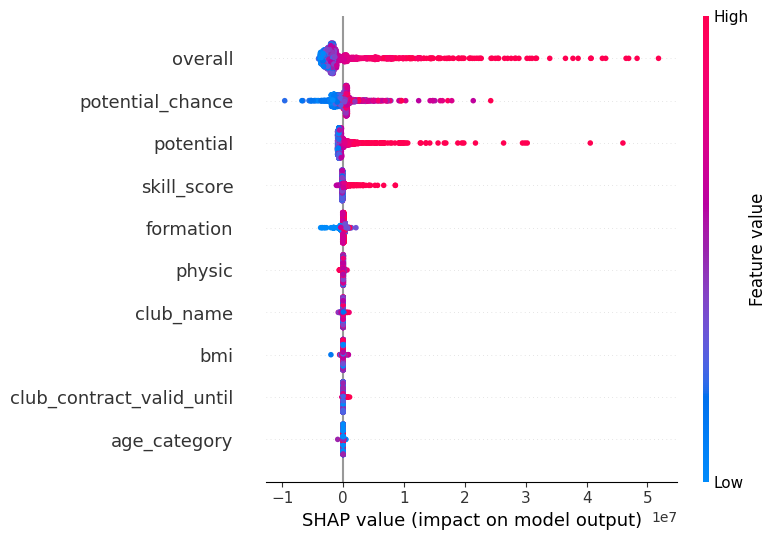

In [36]:
# Train XGBoost
model = xgb.XGBRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
# Compute SHAP values
shap_values = explainer(X_test)
# Plot summary
shap.summary_plot(shap_values, X_test)

Explanation of the SHAP Summary Plot
1. Purpose of the SHAP Summary Plot

- The SHAP summary plot provides insights into how various factors (features) influence the predictions made by our model. In this context, it helps us understand the drivers behind the estimated market value of football players in our dataset.

2. Key Components of the Plot

- Feature Names: The plot displays different factors or features that impact player value, such as age, overall skill rating, and potential.
- Impact of Features: Each feature is represented with a spread of colors and points. The position of these points along the horizontal axis indicates whether a feature increases or decreases the predicted market value and to what extent.

Explanation:
From the SHAP summary plot, we confirm the findings from our correlation analysis. Features such as "overall" skill rating and "potential" have the most significant impact on determining a player's market value. In addition, "potential chance", "skill score" and "formation" also have a moderate effect on the predicted value.
Conversely, other features like "club_name" and "BMI" show minimal influence on market value predictions. Therefore, when building a machine learning model for price prediction, focusing on factors related to potential, overall skill, and skill score will be most effective. Features with minor impact should be considered supplementary rather than central to the model.

Conclusion

The analysis identified that **Overall Skill Rating** and **Potential** are the most important factors in estimating a player's market value. These features have the **strongest influence** on a player’s worth, as both correlation analysis and machine learning techniques have consistently highlighted their significance. Additionally, **Skill Score** and **Potential Chance** also play a noteworthy role, while **Contract Duration** has a minor but relevant impact.

### Recommendations

For optimal player valuation and strategic decision-making, the management team should focus on scouting players with high **Overall Skill Ratings** and strong **Potential**. Emphasizing these attributes will provide a clearer picture of a player’s likely market value and future growth potential. Additionally, considering **Skill Score** and **Potential Chance** can further refine evaluations, while **Contract Duration** should be acknowledged as a supplementary factor in valuation assessments.
